In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Datasets\Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Problem in Hand

The aim here is to predict the salary based on the qualifications of the candidates as available or the least case to predict whether the candidate will be placed or not.

### Data Analysis


Right now as an intial look-through, few difficulties present themselves like the presence of different boards which makes judging the percentages at the same level unfair and most probably inaccurate. So we will look at options where those are handled appropriately. But due to lack of data among the other boards(boards only having 2 choices `Central` and `Others`, basically having no division inside the non-central boards), we will have no choice other than to consider all `Others` boards entry equivalent.

Using the data descriptions available as follows: 

`sl_no` : Serial Number

`gender` : Gender- Male='M',Female='F'

`ssc_p` : Secondary Education percentage- 10th Grade

`ssc_b` : Board of Education- Central/ Others

`hsc_p` : Higher Secondary Education percentage- 12th Grade

`hsc_b` : Board of Education- Central/ Others

`hsc_s` : Specialization in Higher Secondary Education

`degree_p` : Degree Percentage

`degree_t` : Under Graduation(Degree type)- Field of degree education

`workex` : Work Experience

`etest_p` : Employability test percentage ( conducted by college)

`specialisation` : Post Graduation(MBA)- Specialization

`mba_p` : MBA percentage

`status` : Status of placement- Placed/Not placed

`salary` : Salary offered by corporate to candidates

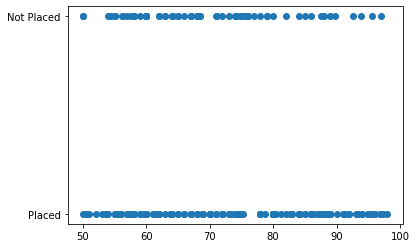

In [11]:
import matplotlib.pyplot as plt
plt.scatter(data['etest_p'],data['status'])